In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_test=pd.read_csv("Titanic_test.csv")
df_train=pd.read_csv("Titanic_train.csv")

In [3]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

In [7]:
df_train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
category=("Sex","Ticket","Cabin","Embarked")
for cat in category:
     df_train[cat] = df_train[cat].astype("category")
    

In [13]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [14]:
# Drop passengerID

df_train.drop("PassengerId", axis=1, inplace=True)

<Figure size 600x400 with 0 Axes>

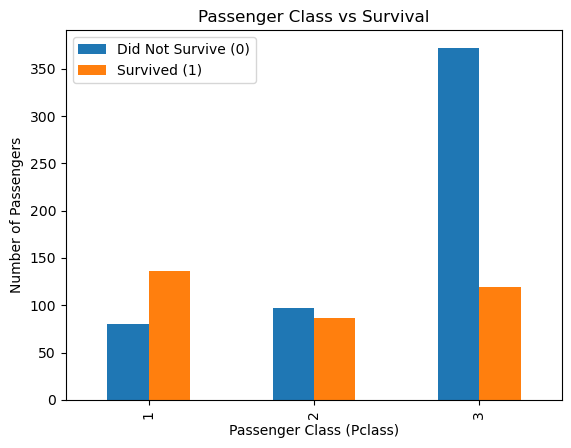

In [15]:
#Plot: Pclass vs Survived 
plt.figure(figsize=(6,4))

# Create a count plot (shows how many 0s and 1s for each Pclass)
pd.crosstab(df_train["Pclass"], df_train["Survived"]).plot(kind="bar")

plt.title("Passenger Class vs Survival")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive (0)", "Survived (1)"])
plt.show()


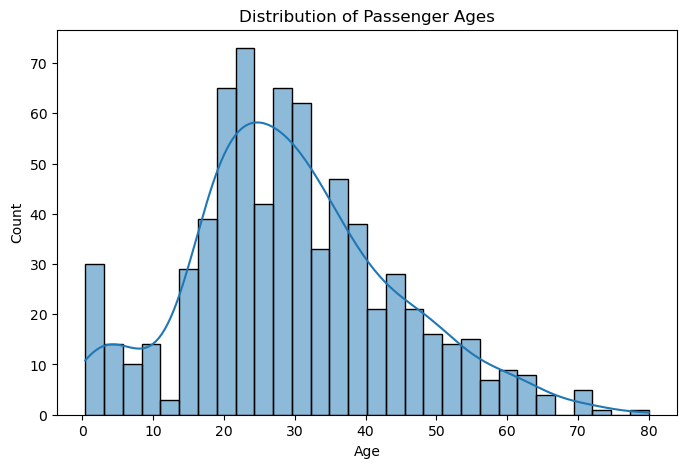

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["Age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

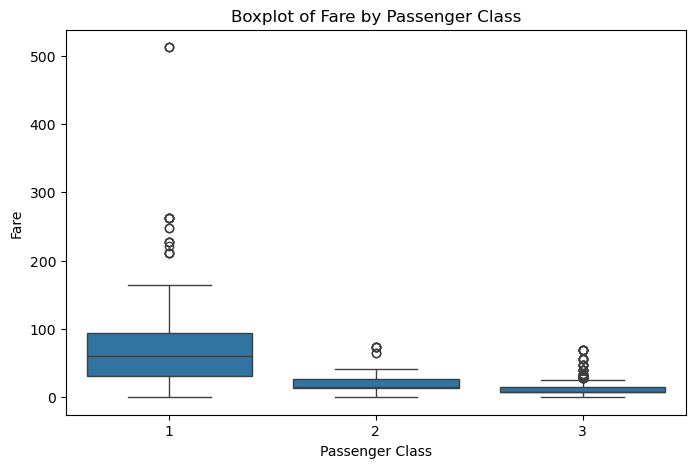

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Fare", data=df_train)
plt.title("Boxplot of Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

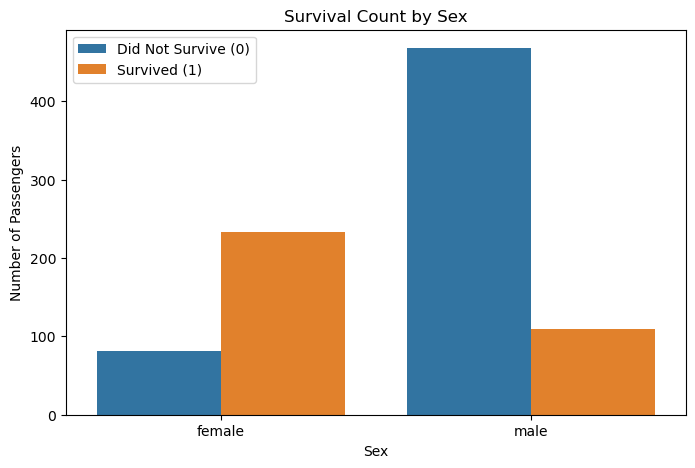

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x="Sex", hue="Survived", data=df_train)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive (0)", "Survived (1)"])
plt.show()

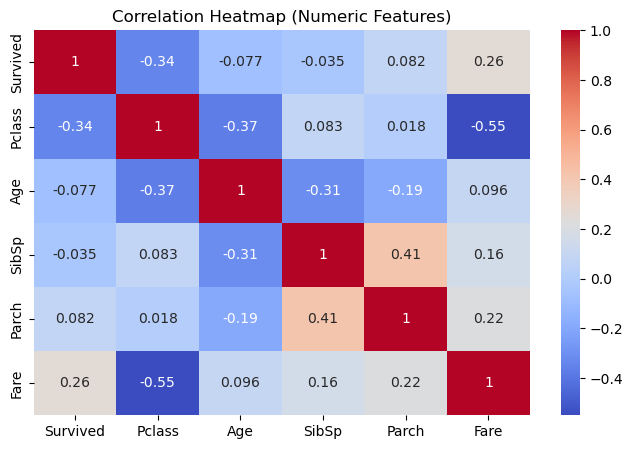

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


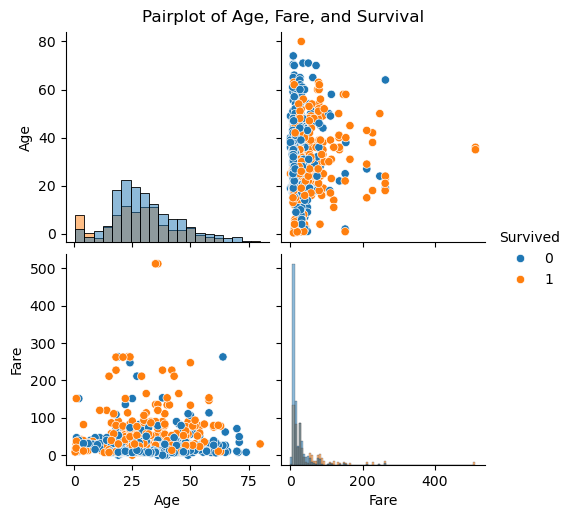

In [20]:
# Pairplot of Age, Fare and Survival
sns.pairplot(df_train[["Survived", "Age", "Fare"]].dropna(),
             hue="Survived", diag_kind="hist")
plt.suptitle("Pairplot of Age, Fare, and Survival", y=1.02)
plt.show()

In [21]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# Fill missing Age with median
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

# Drop Cabin column (too many missing values)
df_train = df_train.drop("Cabin", axis=1)

# Fill missing Embarked with mode
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])


In [23]:
#labelEncoder

le=LabelEncoder()
df_train["Sex"] = le.fit_transform(df_train["Sex"])

#One hot encoding

df_train = pd.get_dummies(df_train, columns=["Embarked"], drop_first=True)

#drop irrelevent columns

df_train=df_train.drop(["Name", "Ticket"], axis=1)

In [24]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False


In [25]:
#make df_test as per df_train

df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [28]:
df_test=df_test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [29]:
#labelEncoder

le=LabelEncoder()
df_test["Sex"] = le.fit_transform(df_test["Sex"])

#One hot encoding

df_test = pd.get_dummies(df_test, columns=["Embarked"], drop_first=True)

In [30]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,True,False
1,3,0,47.0,1,0,7.0000,False,True


In [36]:
df_test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_Q     0
Embarked_S     0
dtype: int64

In [37]:
# Fill missing Age,Fare with median
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [38]:
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y) from training dataset
X_train = df_train.drop("Survived", axis=1)   # features
y_train = df_train["Survived"]                # target

# Create Logistic Regression model
log_model = LogisticRegression(max_iter=200)  # max_iter avoids convergence warning


In [39]:
# Fit model on training data
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [40]:
# Make predictions on the cleaned test dataset
y_pred_test = log_model.predict(df_test)

# Show first 10 predictions
print("First 10 predictions on test set:", y_pred_test[:10])

First 10 predictions on test set: [0 0 0 0 1 0 1 0 1 0]


#Evaluation

In [42]:
#Evaluation 

from sklearn.model_selection import train_test_split

X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Split data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = log_model.predict(X_val)
y_pred_proba = log_model.predict_proba(X_val)[:,1]  # probabilities for ROC

# Metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8827541827541828


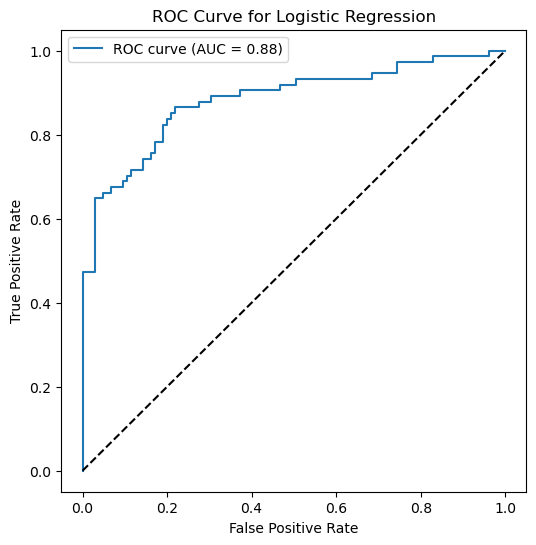

In [43]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


Results Interpretation
1.Accuracy = 0.81
The model correctly classified about 81% of passengers in the test dataset.
This shows the model has good overall correctness.

2.Precision = 0.79
Out of all passengers predicted as survived, about 79% actually survived.
Means the model makes relatively few false alarms (not too many wrong survival predictions).
    
3.Recall = 0.74
Out of all passengers who truly survived, the model correctly identified 74%.
So it missed about 26% of survivors (false negatives).
The recall is decent, but could be improved if we care about catching every survivor.

4.F1 Score = 0.76
This balances precision and recall into a single score.
A value of 0.76 means the model has a fairly good balance:
Not too many false alarms (precision)
Not missing too many survivors (recall).

5.ROC-AUC = 0.88
The ROC-AUC score measures how well the model separates survivors from non-survivors.
0.88 is very high → the model is quite good at distinguishing between the two classes.
In the ROC curve plot, this means the curve is close to the top-left corner, which is ideal.

Conclusion
The logistic regression model performs well on the Titanic dataset.
With ~81% accuracy and 0.88 ROC-AUC, it captures survival patterns effectively.
Precision and recall are balanced, though the model slightly misses some survivors.

In [44]:
# Get feature names and coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
})

print(coefficients)

      Feature  Coefficient
0      Pclass    -0.939276
1         Sex    -2.591515
2         Age    -0.030595
3       SibSp    -0.295209
4       Parch    -0.107390
5        Fare     0.002567
6  Embarked_Q    -0.108478
7  Embarked_S    -0.400165


Feature	Coefficient	Interpretation
1.Pclass	-0.94	Negative → Higher class number (2 = 2nd, 3 = 3rd) reduces survival chances. 1st class passengers had higher survival.

2.Sex	-2.59	Strong negative → Since Male=1 and Female=0, being male greatly reduced survival probability. Females had much higher survival.

3.Age	-0.03	Slight negative → Older passengers were slightly less likely to survive. Younger passengers had better survival.

4.SibSp	-0.30	Negative → Having more siblings/spouses aboard decreased survival chances.

5.Parch	-0.11	Negative → Having more parents/children aboard slightly reduced survival chances.

6.Fare	+0.0026	Positive → Higher ticket fare (wealthier passengers) increased survival chances.

7.Embarked_Q	-0.11	Negative compared to Cherbourg (baseline). Passengers from Queenstown had slightly lower survival.

8.Embarked_S	-0.40	Negative compared to Cherbourg. Passengers from Southampton had lower survival.

b. Significance of features in predicting survival probability

Sex was the most significant factor. Females had much higher survival chances than males, reflecting the “women and children first” policy.

Pclass was another strong predictor. First-class passengers had better access to lifeboats, while third-class passengers had the lowest survival.

Fare also played a role, as higher ticket prices were linked to first-class cabins and higher survival rates.

Age showed that younger passengers, especially children, had better chances of survival compared to older passengers.

Family size (SibSp, Parch) negatively affected survival. Passengers with many family members aboard were less likely to survive, possibly due to difficulties in escaping together.

Embarked location mattered. Passengers from Cherbourg had higher survival compared to those from Southampton or Queenstown.

In [45]:
import pickle
pickle.dump(log_model, open("titanic_model.pkl", "wb"))